In [26]:
import pandas as pd
import datarobot as dr
import matplotlib.pylab as plt
%matplotlib inline

In [157]:
data = pd.read_excel('../../DataRobot/Datasets/DR_Demo_Sales_Multiseries_training.xlsx')

In [4]:
data.head()

,Store,Date,Sales,Store_Size,Num_Employees,Returns_Pct,Num_Customers,Pct_On_Sale,Marketing,Near_Xmas,Near_BlackFriday,Holiday,DestinationEvent,Pct_Promotional,Econ_ChangeGDP,EconJobsChange,AnnualizedCPI
0,Louisville,2012-07-01,109673,20100,68,1.03,531,9.96,July In Store Credit Card Signup Discount; In ...,0,0,No,No,0.000047,0.5,NaN,0.02
1,Louisville,2012-07-02,131791,20100,34,0.41,476,8.65,July In Store Credit Card Signup Discount; In ...,0,0,No,No,0.000047,NaN,NaN,NaN
2,Louisville,2012-07-03,134711,20100,42,0.31,578,8.96,July In Store Credit Card Signup Discount; In ...,0,0,No,No,0.000047,NaN,NaN,NaN
3,Louisville,2012-07-04,97640,20100,54,0.83,569,10.08,July In Store Credit Card Signup Discount; In ...,0,0,Yes,No,0.000047,NaN,NaN,NaN
4,Louisville,2012-07-05,129538,20100,62,0.51,486,9.80,July In Store Credit Card Signup Discount; ID5...,0,0,No,No,0.000047,NaN,NaN,NaN


### Quick look at the data

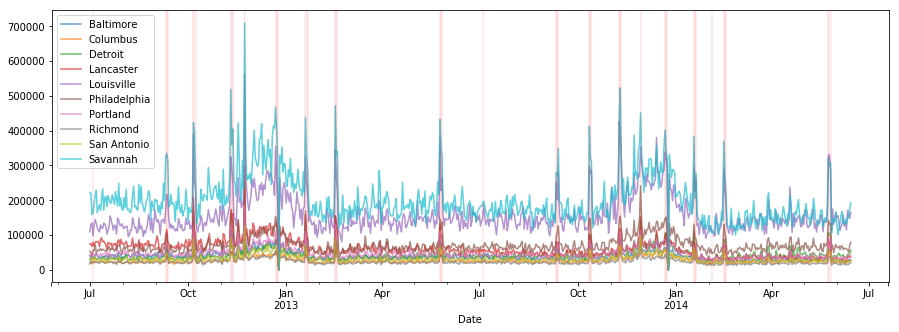

In [46]:
data.set_index('Date').groupby('Store').Sales.plot(figsize=(15,5), alpha=.7, legend=True);
# adding holidays
[plt.axvline(x, alpha=.1, c='r') for x in data.loc[data.Holiday == 'Yes','Date'].drop_duplicates()];

In [6]:
target = 'Sales'
kia_vars = ['Near_Xmas','Near_BlackFriday','Holiday','DestinationEvent']

In [9]:
feature_settings = []
for column in kia_vars:
    feature_settings.append(dr.FeatureSettings(column, known_in_advance=True))

### Preparing the time-series config

In [13]:
partitioning_spec = dr.DatetimePartitioningSpecification(datetime_partition_column='Date',
                                                         forecast_window_start=1, 
                                                         forecast_window_end=7,
                                                         validation_duration='P68D', 
                                                         number_of_backtests=3,
                                                         use_time_series=True,
                                                         feature_derivation_window_start=-28,
                                                         feature_derivation_window_end=0,
                                                         feature_settings=feature_settings,
                                                         multiseries_id_columns=['Store']
                                                        )                         

### Upload the data

In [ ]:
project = dr.Project.create(data, project_name=f'Multi TS API test')

### set target and partitioning - this includes setting up the time-series mode

In [14]:
project.set_target(target, partitioning_method=partitioning_spec, mode=dr.AUTOPILOT_MODE.FULL_AUTO, 
                   worker_count=10)

Project(Multi TS API test)

### Print date time partitioning for the created project

In [17]:
dr.DatetimePartitioning.get(project.id).to_dataframe()

,start_date,duration,end_date
available_training,2012-08-06 00:00:00+00:00,P0Y0M610D,2014-04-08 00:00:00+00:00
gap,2014-04-08 00:00:00+00:00,P0Y0M0D,2014-04-08 00:00:00+00:00
holdout,2014-04-08 00:00:00+00:00,P68D,2014-06-15 00:00:00+00:00
primary_training,2013-02-26 00:00:00+00:00,P1Y1M10D,2014-04-08 00:00:00+00:00
backtest_0_available_training,2012-08-06 00:00:00+00:00,P0Y0M542D,2014-01-30 00:00:00+00:00
backtest_0_gap,2014-01-30 00:00:00+00:00,P0Y0M0D,2014-01-30 00:00:00+00:00
backtest_0_primary_training,2012-12-20 00:00:00+00:00,P1Y1M10D,2014-01-30 00:00:00+00:00
backtest_0_validation,2014-01-30 00:00:00+00:00,P68D,2014-04-08 00:00:00+00:00
backtest_1_available_training,2012-08-06 00:00:00+00:00,P0Y0M474D,2013-11-23 00:00:00+00:00
backtest_1_gap,2013-11-23 00:00:00+00:00,P0Y0M0D,2013-11-23 00:00:00+00:00


In [127]:
pred_data = pd.read_excel('../../DataRobot/Datasets/DR_Demo_Sales_Multiseries_prediction.xlsx')

In [52]:
pred_data.tail(20)

,Store,Date,Sales,Store_Size,Returns_Pct,Num_Customers,Pct_On_Sale,Marketing,Near_Xmas,Near_BlackFriday,Holiday,DestinationEvent,Pct_Promotional,Econ_ChangeGDP,EconJobsChange,AnnualizedCPI,Num_Employees
7270,San Antonio,2014-06-10,23271.0,17000,0.65,59.0,13.82,Promo In Store Credit Card Signup Discount; ID...,0,0,No,No,0.064925,NaN,NaN,NaN,7.0
7271,San Antonio,2014-06-11,21532.0,17000,0.30,65.0,12.24,Promo In Store Credit Card Signup Discount; ID...,0,0,No,No,0.064925,NaN,NaN,NaN,9.0
7272,San Antonio,2014-06-12,25799.0,17000,0.16,59.0,12.40,Promo In Store Credit Card Signup Discount; ID...,0,0,No,No,0.064925,NaN,NaN,NaN,15.0
7273,San Antonio,2014-06-13,30380.0,17000,0.59,82.0,14.43,Promo In Store Credit Card Signup Discount; ID...,0,0,No,No,0.064925,NaN,NaN,NaN,13.0
7274,San Antonio,2014-06-14,29133.0,17000,0.85,115.0,12.90,Promo In Store Credit Card Signup Discount; ID...,0,0,No,No,0.064925,NaN,-2250.0,NaN,13.0
7275,San Antonio,2014-06-15,NaN,17000,NaN,NaN,NaN,Promo In Store Credit Card Signup Discount; ID...,0,0,No,No,NaN,NaN,NaN,NaN,NaN
7276,San Antonio,2014-06-16,NaN,17000,NaN,NaN,NaN,Promo In Store Credit Card Signup Discount; ID...,0,0,No,No,NaN,NaN,NaN,NaN,NaN
7277,San Antonio,2014-06-17,NaN,17000,NaN,NaN,NaN,Promo In Store Credit Card Signup Discount; ID...,0,0,No,No,NaN,NaN,NaN,NaN,NaN
7278,San Antonio,2014-06-18,NaN,17000,NaN,NaN,NaN,Promo In Store Credit Card Signup Discount; ID...,0,0,No,No,NaN,NaN,NaN,NaN,NaN
7279,San Antonio,2014-06-19,NaN,17000,NaN,NaN,NaN,Promo In Store Credit Card Signup Discount; ID...,0,0,No,No,NaN,NaN,NaN,NaN,NaN


In [49]:
top_model = project.get_models()[0]

In [50]:
top_model

Model('eXtreme Gradient Boosted Trees Regressor with Early Stopping')

In [109]:
dataset = project.upload_dataset(pred_data, 
                                 predictions_start_date=pd.to_datetime('2014-06-01'), 
                                 predictions_end_date=pd.to_datetime('2014-06-14'))

In [110]:
prediction_job = top_model.request_predictions(dataset.id)

In [111]:
predictions = prediction_job.get_result_when_complete()

In [112]:
data.Date = pd.to_datetime(data.Date)
predictions.timestamp = pd.to_datetime(predictions.timestamp)

## Plot predictions by forecast point

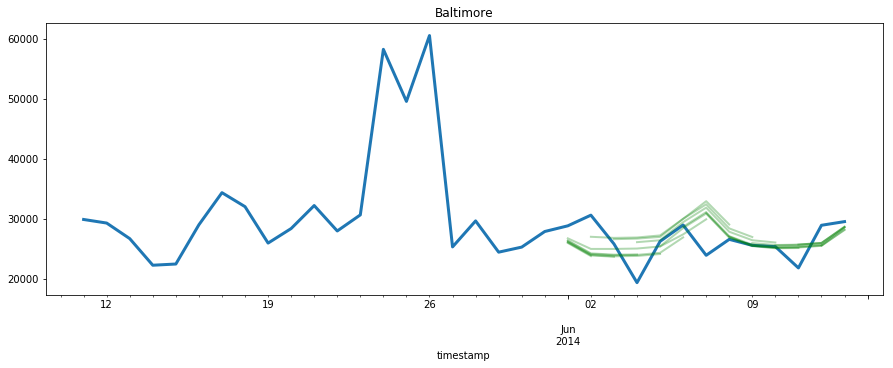

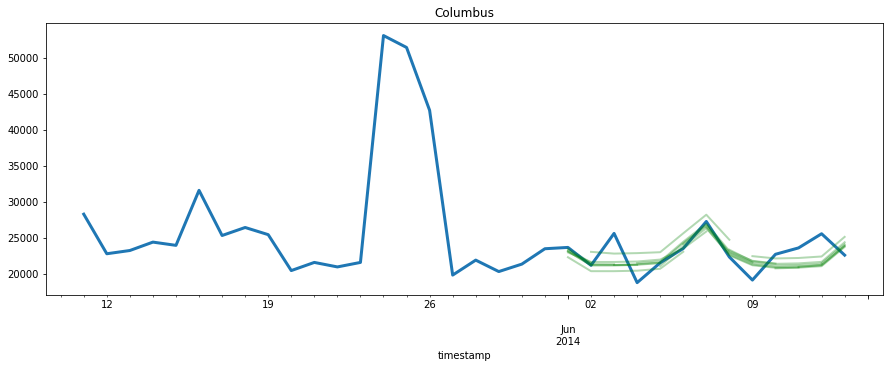

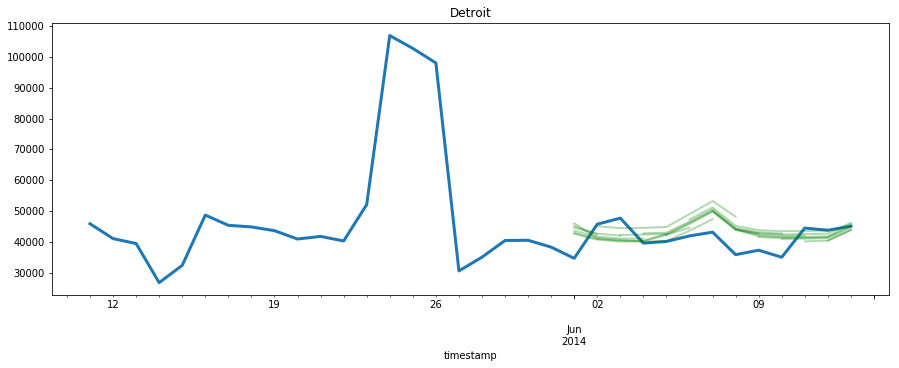

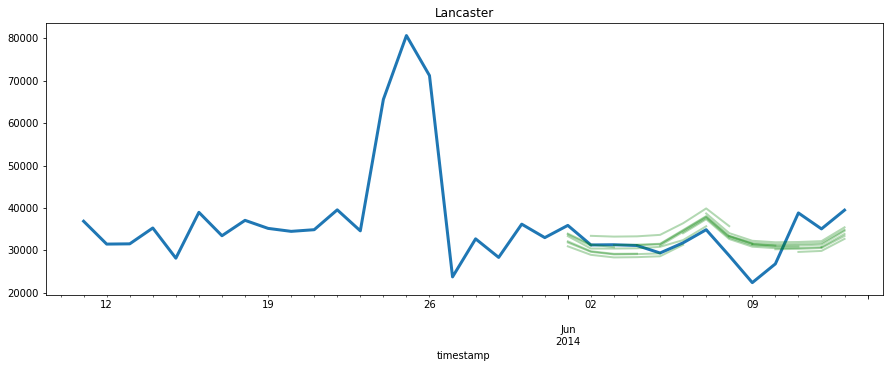

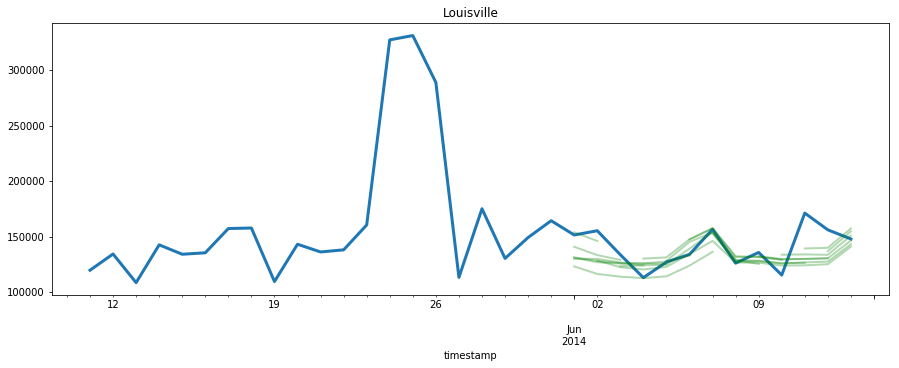

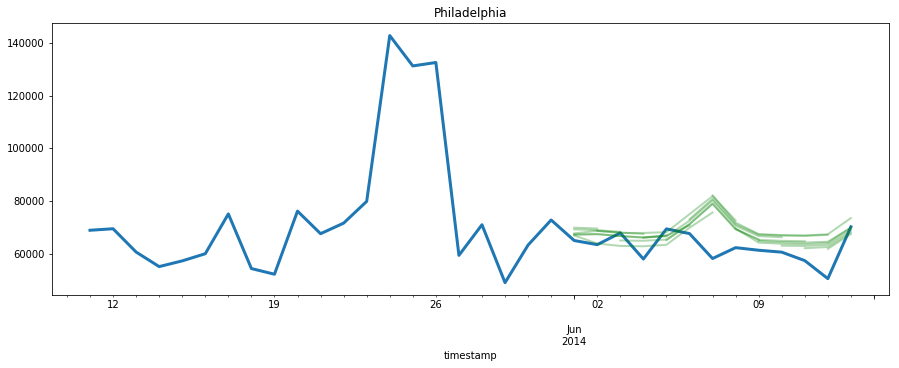

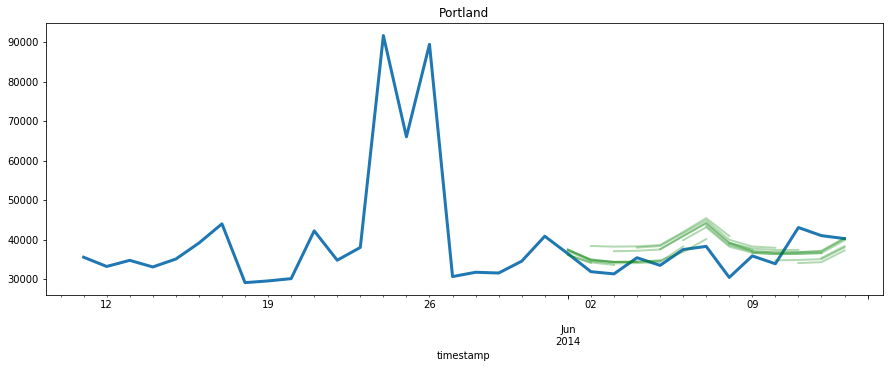

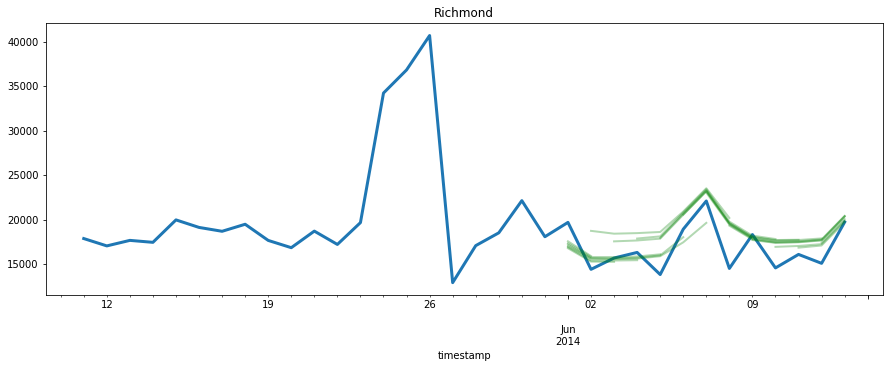

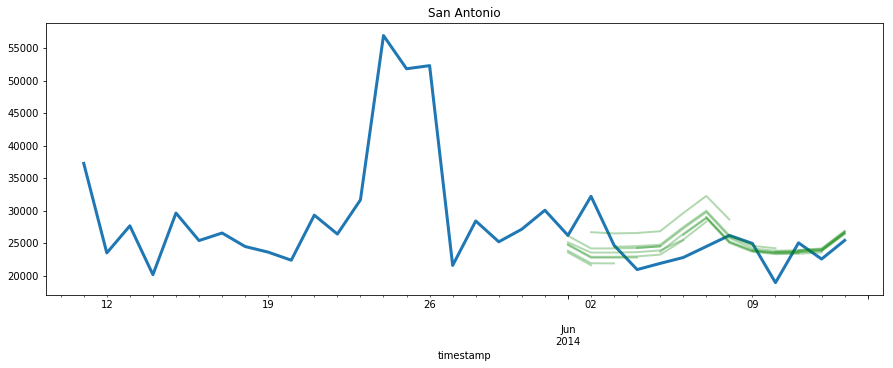

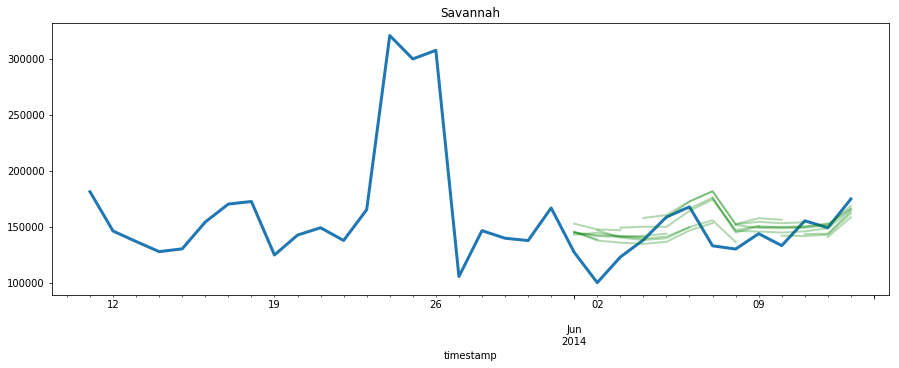

In [158]:
for store, g in predictions.groupby('series_id'):
    fig, ax = plt.subplots(figsize=(15,5))
    data[data.Store == store].set_index('Date').Sales.iloc[-35:-1].plot(ax=ax, linewidth=3)
    g.set_index('timestamp')\
      .groupby(['forecast_point'])['prediction'].plot(ax=ax, c='g', alpha=.3, linewidth=2)
    plt.title(store)
    plt.show()

## Deploy the API - then continue

In [144]:
pred_data = pd.read_excel('../../DataRobot/Datasets/DR_Demo_Sales_Multiseries_prediction.xlsx')

### Excel messes with the dates, or is it pandas?

In [145]:
pred_data.Date = pred_data.Date.astype(str)

In [ ]:
import requests
import sys

API_TOKEN = 'XXX'
USERNAME = 'max.mustermann@datarobot.com'
DATAROBOT_KEY = 'abcdefg'
DEPLOYMENT_ID = '5c464fb4969ce0001dd2c9d9'

# Set HTTP headers
# Note: The charset should match the contents of the file.
headers = {'Content-Type': 'application/json; charset=UTF-8', 'datarobot-key': DATAROBOT_KEY}

### Prepare data to look like json, we can also read csv from file directly

In [159]:
dict_data = pred_data.to_dict(orient='records')

In [160]:
# Make predictions on your data
# The URL has the following format:
#     https://cfds-ccm-prod.orm.datarobot.com/predApi/v1.0/deployments/<DEPLOYMENT_ID>/timeSeriesPredictions
# See docs for details:
#     app.datarobot.com/docs/users-guide/deploy/api/new-prediction-api.html
predictions_response = requests.post('https://cfds-ccm-prod.orm.datarobot.com/predApi/v1.0/deployments/%s/timeSeriesPredictions' % (DEPLOYMENT_ID),
                                     auth=(USERNAME, API_TOKEN), json=dict_data, headers=headers)

predictions_response.raise_for_status()
print(predictions_response.json())

{'data': [{'seriesId': 'Louisville', 'forecastPoint': '2014-06-14T00:00:00Z', 'rowId': 714, 'timestamp': '2014-06-15T00:00:00.000000Z', 'predictionValues': [{'value': 138180.7908412388, 'label': 'Sales (actual)'}], 'forecastDistance': 1, 'prediction': 138180.7908412388}, {'seriesId': 'Louisville', 'forecastPoint': '2014-06-14T00:00:00Z', 'rowId': 715, 'timestamp': '2014-06-16T00:00:00.000000Z', 'predictionValues': [{'value': 136403.393624442, 'label': 'Sales (actual)'}], 'forecastDistance': 2, 'prediction': 136403.393624442}, {'seriesId': 'Louisville', 'forecastPoint': '2014-06-14T00:00:00Z', 'rowId': 716, 'timestamp': '2014-06-17T00:00:00.000000Z', 'predictionValues': [{'value': 134652.276436942, 'label': 'Sales (actual)'}], 'forecastDistance': 3, 'prediction': 134652.276436942}, {'seriesId': 'Louisville', 'forecastPoint': '2014-06-14T00:00:00Z', 'rowId': 717, 'timestamp': '2014-06-18T00:00:00.000000Z', 'predictionValues': [{'value': 134790.956124442, 'label': 'Sales (actual)'}], 'for

In [161]:
pd.DataFrame.from_dict(predictions_response.json()['data'], orient='columns')

,forecastDistance,forecastPoint,prediction,predictionValues,rowId,seriesId,timestamp
0,1,2014-06-14T00:00:00Z,138180.790841,"[{'value': 138180.7908412388, 'label': 'Sales ...",714,Louisville,2014-06-15T00:00:00.000000Z
1,2,2014-06-14T00:00:00Z,136403.393624,"[{'value': 136403.393624442, 'label': 'Sales (...",715,Louisville,2014-06-16T00:00:00.000000Z
2,3,2014-06-14T00:00:00Z,134652.276437,"[{'value': 134652.276436942, 'label': 'Sales (...",716,Louisville,2014-06-17T00:00:00.000000Z
3,4,2014-06-14T00:00:00Z,134790.956124,"[{'value': 134790.956124442, 'label': 'Sales (...",717,Louisville,2014-06-18T00:00:00.000000Z
4,5,2014-06-14T00:00:00Z,136732.962472,"[{'value': 136732.9624720982, 'label': 'Sales ...",718,Louisville,2014-06-19T00:00:00.000000Z
5,6,2014-06-14T00:00:00Z,153168.384347,"[{'value': 153168.3843470982, 'label': 'Sales ...",719,Louisville,2014-06-20T00:00:00.000000Z
6,7,2014-06-14T00:00:00Z,163424.260324,"[{'value': 163424.2603236607, 'label': 'Sales ...",720,Louisville,2014-06-21T00:00:00.000000Z
7,1,2014-06-14T00:00:00Z,67461.795567,"[{'value': 67461.7955671038, 'label': 'Sales (...",1443,Philadelphia,2014-06-15T00:00:00.000000Z
8,2,2014-06-14T00:00:00Z,63692.085484,"[{'value': 63692.085484096, 'label': 'Sales (a...",1444,Philadelphia,2014-06-16T00:00:00.000000Z
9,3,2014-06-14T00:00:00Z,63246.390172,"[{'value': 63246.390171596, 'label': 'Sales (a...",1445,Philadelphia,2014-06-17T00:00:00.000000Z
